In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("churn_clean.csv")

In [48]:
columns = ['State', 'Area','Marital', 'Gender','Techie', 'InternetService', 'OnlineBackup','DeviceProtection', 
           'TechSupport','Bandwidth_GB_Year', 'Population', 'Age', 'Email', 'Yearly_equip_failure', 'Outage_sec_perweek']

In [18]:
cat_columns = ['State', 'Area', 'Marital', 'Gender', 'Techie','InternetService','OnlineBackup','DeviceProtection','TechSupport']
num_columns = ["Population", "Age", 'Outage_sec_perweek', 'Email', 'Yearly_equip_failure', 'Bandwidth_GB_Year']

### Summary Statistic

In [46]:
updated_data = data[columns]
updated_data

,State,Population,Area,Age,Marital,Gender,Outage_sec_perweek,Email,Yearly_equip_failure,Techie,InternetService,OnlineBackup,DeviceProtection,TechSupport,Bandwidth_GB_Year
0,AK,38,Urban,68,Widowed,Male,7.978323,10,1,No,Fiber Optic,Yes,No,No,904.536110
1,MI,10446,Urban,27,Married,Female,11.699080,12,1,Yes,Fiber Optic,No,No,No,800.982766
2,OR,3735,Urban,50,Widowed,Female,10.752800,9,1,Yes,DSL,No,No,No,2054.706961
3,CA,13863,Suburban,48,Married,Male,14.913540,15,0,Yes,DSL,No,No,No,2164.579412
4,TX,11352,Suburban,83,Separated,Male,8.147417,16,1,No,Fiber Optic,No,No,Yes,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,VT,640,Rural,23,Married,Male,9.415935,12,0,No,DSL,Yes,Yes,No,6511.252601
9996,TN,77168,Rural,48,Divorced,Male,6.740547,15,0,No,Fiber Optic,Yes,Yes,No,5695.951810
9997,TX,406,Rural,48,Never Married,Female,6.590911,10,0,No,Fiber Optic,Yes,No,No,4159.305799
9998,GA,35575,Urban,39,Separated,Male,12.071910,14,0,No,Fiber Optic,No,No,Yes,6468.456752


In [20]:
data[num_columns].describe()

,Population,Age,Outage_sec_perweek,Email,Yearly_equip_failure,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,53.078400,10.001848,12.016000,0.398000,3392.341550
std,14432.698671,20.698882,2.976019,3.025898,0.635953,2185.294852
min,0.000000,18.000000,0.099747,1.000000,0.000000,155.506715
25%,738.000000,35.000000,8.018214,10.000000,0.000000,1236.470827
50%,2910.500000,53.000000,10.018560,12.000000,0.000000,3279.536903
75%,13168.000000,71.000000,11.969485,14.000000,1.000000,5586.141370
max,111850.000000,89.000000,21.207230,23.000000,6.000000,7158.981530


In [21]:
data[cat_columns].describe()

,State,Area,Marital,Gender,Techie,InternetService,OnlineBackup,DeviceProtection,TechSupport
count,10000,10000,10000,10000,10000,7871,10000,10000,10000
unique,52,3,5,3,2,2,2,2,2
top,TX,Suburban,Divorced,Female,No,Fiber Optic,No,No,No
freq,603,3346,2092,5025,8321,4408,5494,5614,6250


### More Indepth with Categorical Varibles

In [22]:
state = updated_data.groupby(cat_columns[0]).Email.size().sort_values(ascending = False).reset_index()
state

,State,Email
0,TX,603
1,NY,558
2,PA,550
3,CA,526
4,IL,413
5,OH,359
6,FL,324
7,MO,310
8,VA,285
9,NC,280


In [23]:
area = updated_data.groupby(cat_columns[1]).Email.size().reset_index()
area

,Area,Email
0,Rural,3327
1,Suburban,3346
2,Urban,3327


In [24]:
marital = updated_data.groupby(cat_columns[2]).Email.size().reset_index()
marital

,Marital,Email
0,Divorced,2092
1,Married,1911
2,Never Married,1956
3,Separated,2014
4,Widowed,2027


In [25]:
gender = updated_data.groupby(cat_columns[3]).Email.size().reset_index()
gender

,Gender,Email
0,Female,5025
1,Male,4744
2,Nonbinary,231


In [26]:
Techie = updated_data.groupby(cat_columns[4]).Email.size().reset_index()
Techie

,Techie,Email
0,No,8321
1,Yes,1679


In [27]:
internet = updated_data.groupby(cat_columns[5]).Email.size().reset_index()
internet

,InternetService,Email
0,DSL,3463
1,Fiber Optic,4408


In [28]:
online_backup = updated_data.groupby(cat_columns[6]).Email.size().reset_index()
online_backup

,OnlineBackup,Email
0,No,5494
1,Yes,4506


In [29]:
device = updated_data.groupby(cat_columns[7]).Email.size().reset_index()
device

,DeviceProtection,Email
0,No,5614
1,Yes,4386


In [30]:
support = updated_data.groupby(cat_columns[8]).Email.size().reset_index()
support

,TechSupport,Email
0,No,6250
1,Yes,3750


### Univariate Visualization

<Axes: >

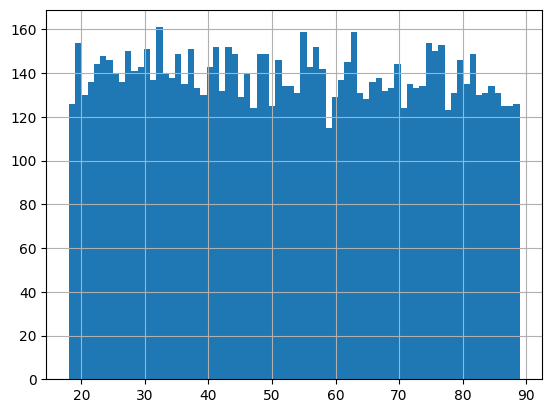

In [31]:
updated_data.Age.hist(bins = 72)

<Axes: >

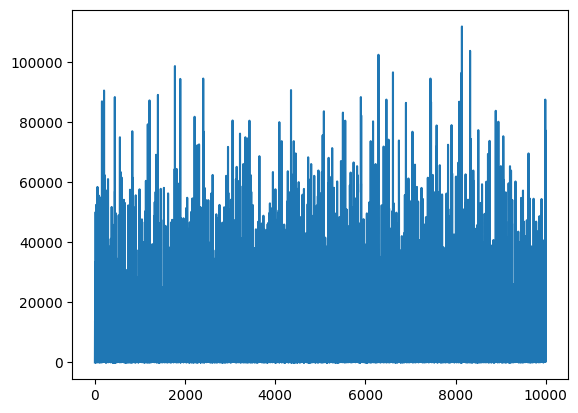

In [32]:
data.Population.plot()

<Axes: >

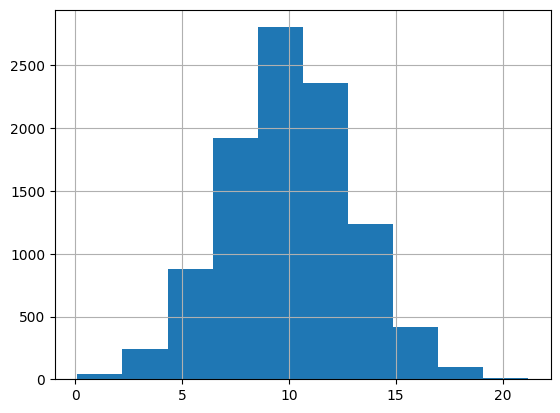

In [33]:
data.Outage_sec_perweek.hist()

<Axes: >

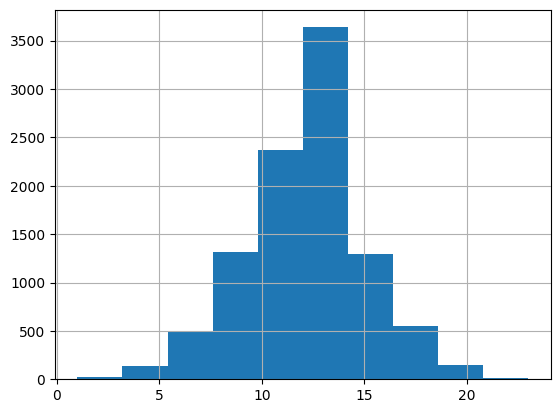

In [34]:
data.Email.hist()

<Axes: >

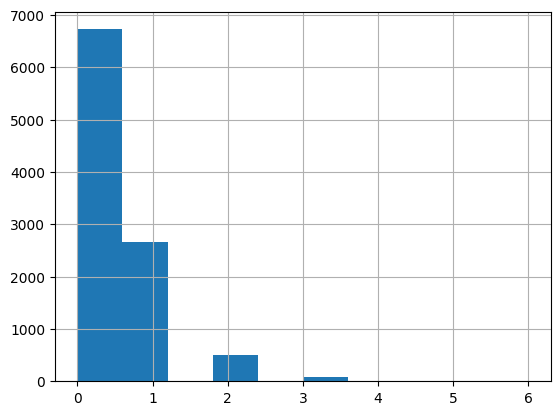

In [35]:
data.Yearly_equip_failure.hist()

<Axes: >

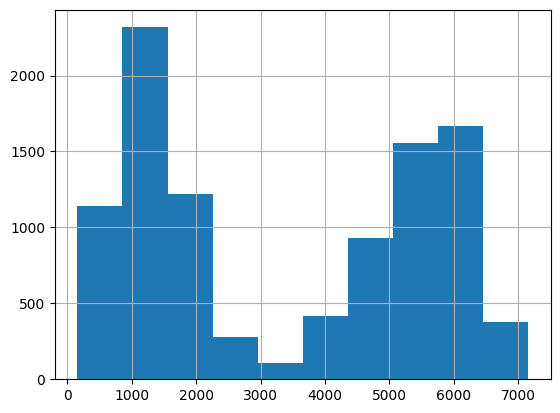

In [36]:
data.Bandwidth_GB_Year.hist()

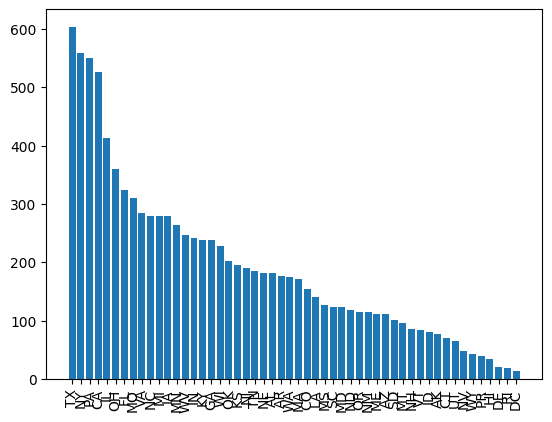

In [37]:
plt.bar(state.State, state.Email)
plt.xticks(rotation=90)
plt.show()

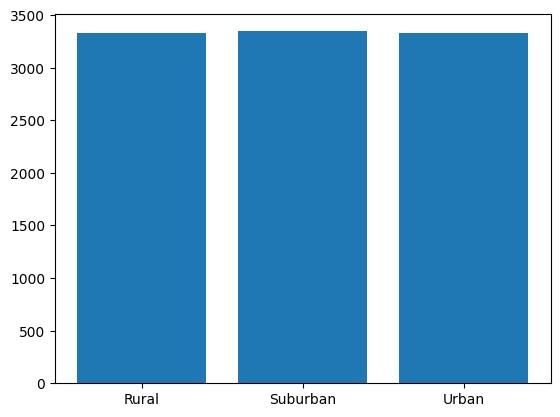

In [38]:
plt.bar(area.Area, area.Email)
plt.show()

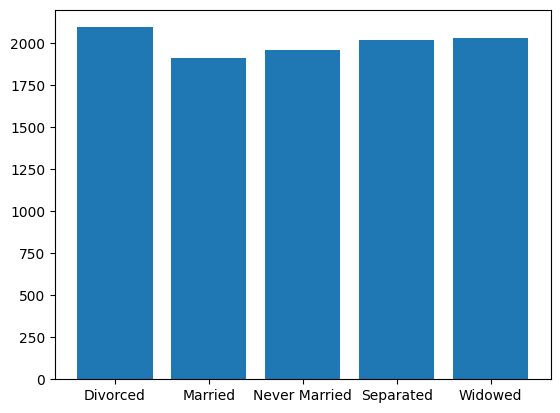

In [39]:
plt.bar(marital.Marital, marital.Email)
plt.show()

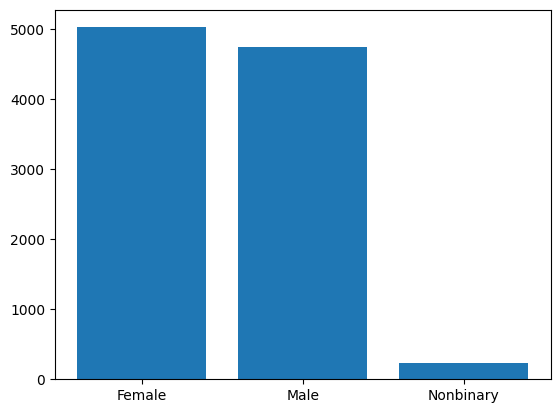

In [40]:
plt.bar(gender.Gender, gender.Email)
plt.show()

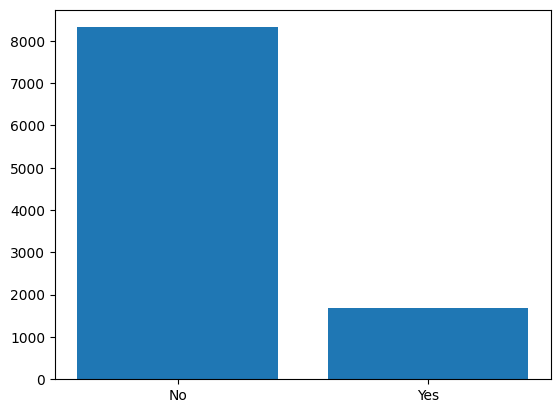

In [41]:
plt.bar(Techie.Techie, Techie.Email)
plt.show()

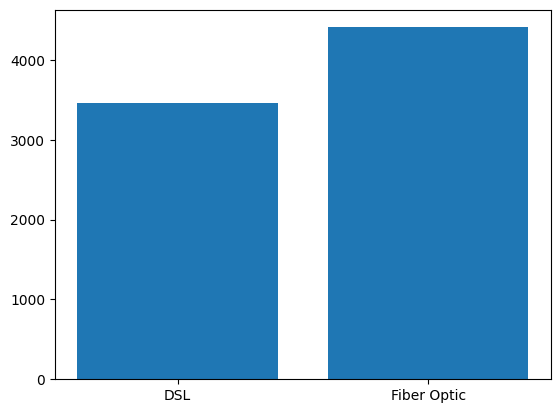

In [42]:
plt.bar(internet.InternetService, internet.Email)
plt.show()

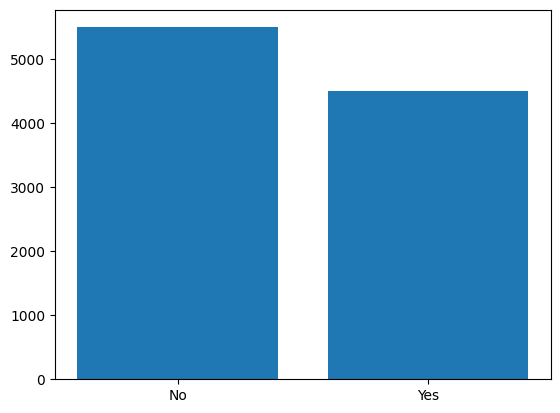

In [43]:
plt.bar(online_backup.OnlineBackup, online_backup.Email)
plt.show()

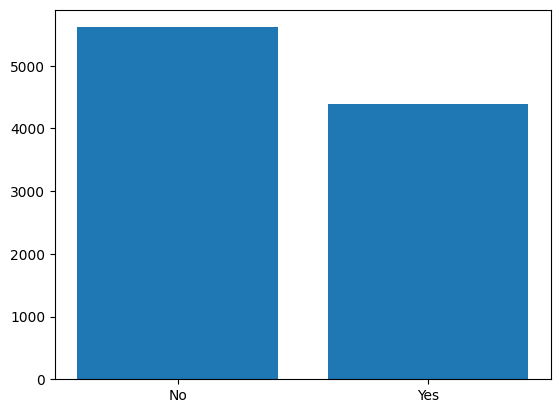

In [44]:
plt.bar(device.DeviceProtection, device.Email)
plt.show()

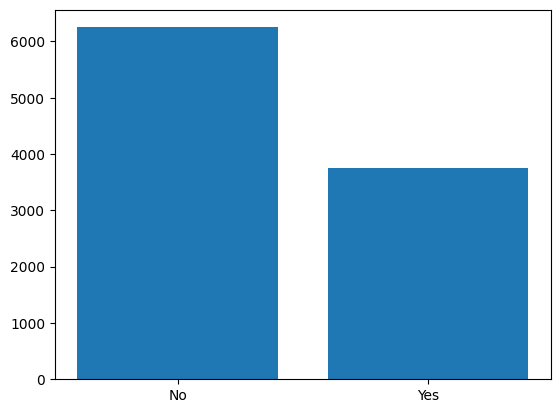

In [45]:
plt.bar(support.TechSupport, support.Email)
plt.show()

### Bivariate Statistics 

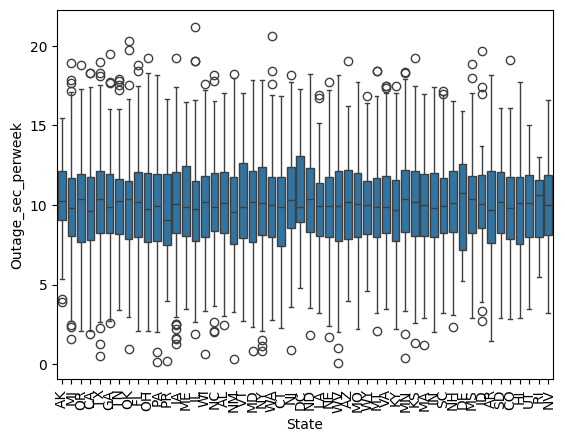

In [54]:
sns.boxplot(data= updated_data, x = "State", y = "Outage_sec_perweek")
plt.xticks(rotation=90)
plt.show()

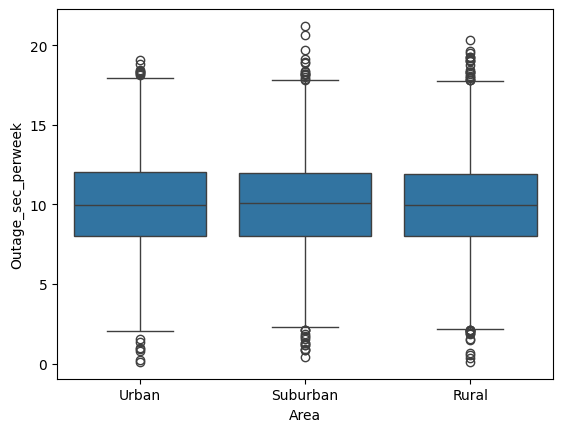

In [53]:
sns.boxplot(data= updated_data, x = "Area", y = "Outage_sec_perweek")
plt.show()

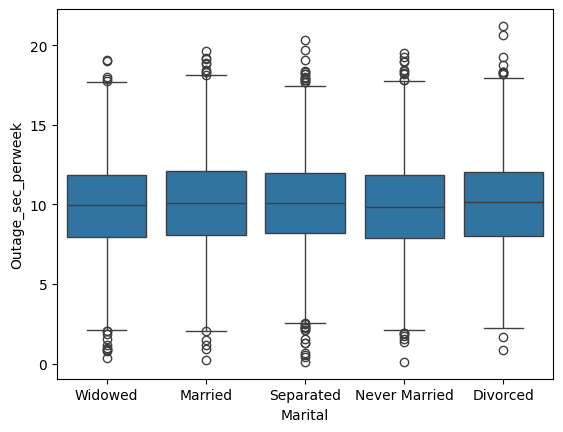

In [55]:
sns.boxplot(data= updated_data, x = "Marital", y = "Outage_sec_perweek")
plt.show()

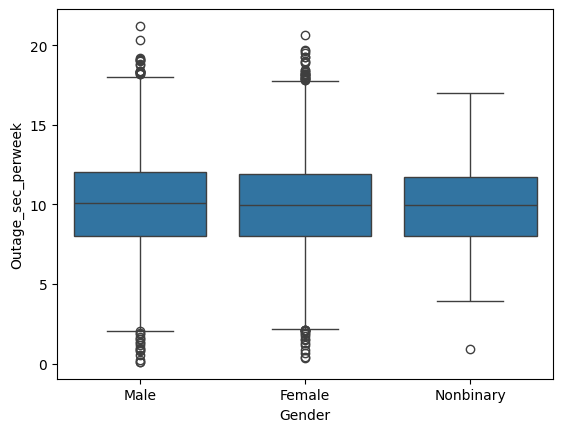

In [56]:
sns.boxplot(data= updated_data, x = "Gender", y = "Outage_sec_perweek")
plt.show()

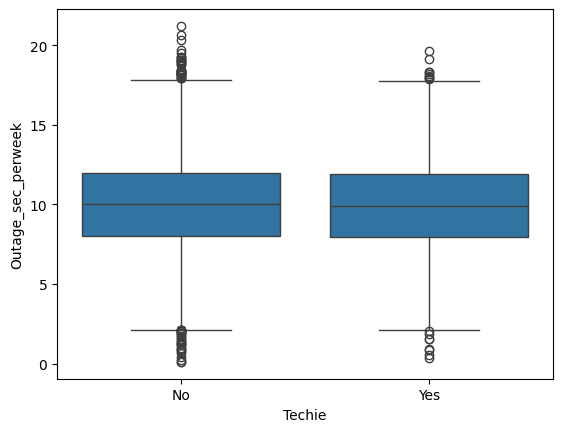

In [57]:
sns.boxplot(data= updated_data, x = "Techie", y = "Outage_sec_perweek")
plt.show()

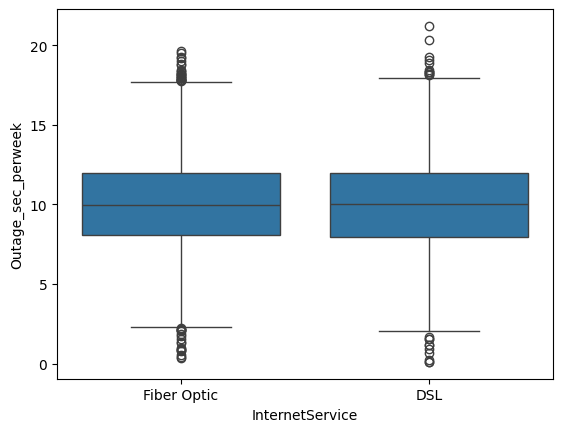

In [58]:
sns.boxplot(data= updated_data, x = "InternetService", y = "Outage_sec_perweek")
plt.show()

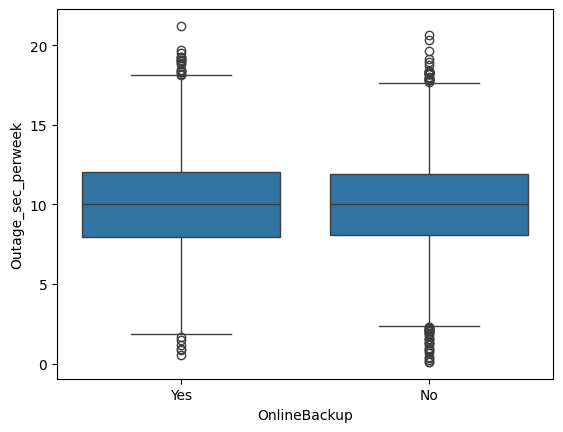

In [59]:
sns.boxplot(data= updated_data, x = "OnlineBackup", y = "Outage_sec_perweek")
plt.show()

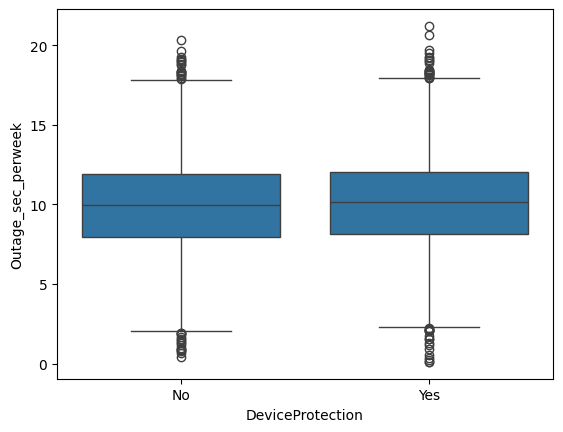

In [60]:
sns.boxplot(data= updated_data, x = "DeviceProtection", y = "Outage_sec_perweek")
plt.show()

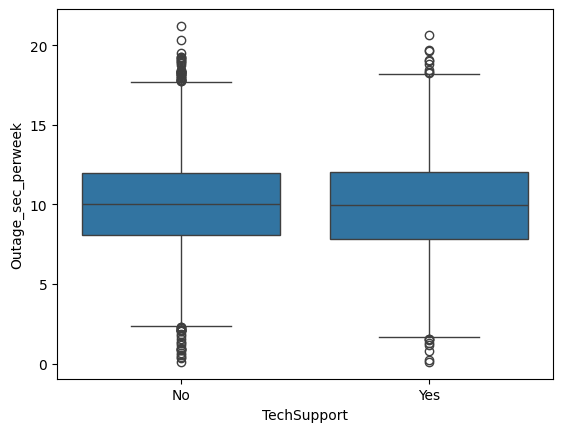

In [61]:
sns.boxplot(data= updated_data, x = "TechSupport", y = "Outage_sec_perweek")
plt.show()

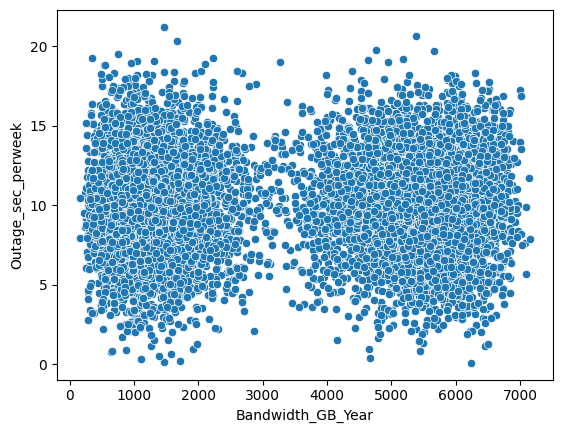

In [63]:
sns.scatterplot(data= updated_data, x = "Bandwidth_GB_Year", y = "Outage_sec_perweek")
plt.show()

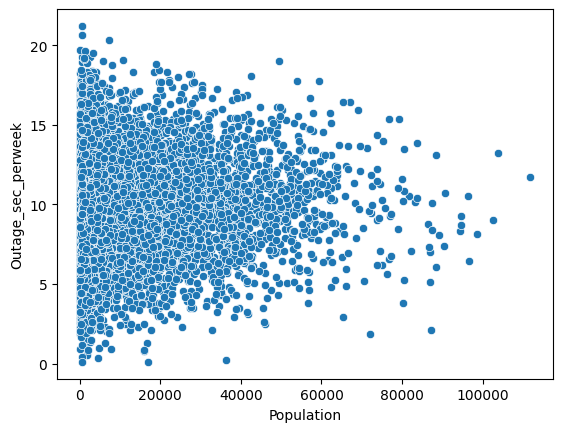

In [64]:
sns.scatterplot(data= updated_data, x = "Population", y = "Outage_sec_perweek")
plt.show()

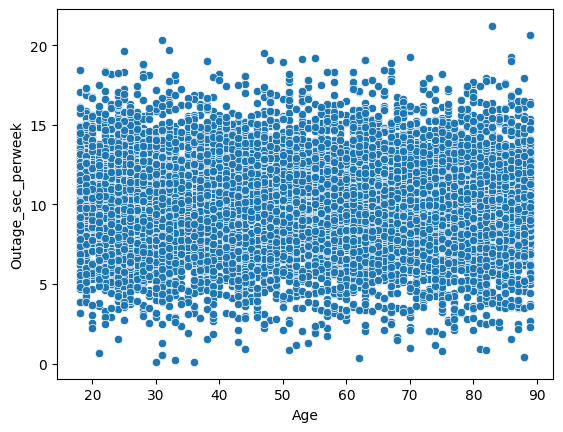

In [69]:
sns.scatterplot(data= updated_data, x = "Age", y = "Outage_sec_perweek")
plt.show()

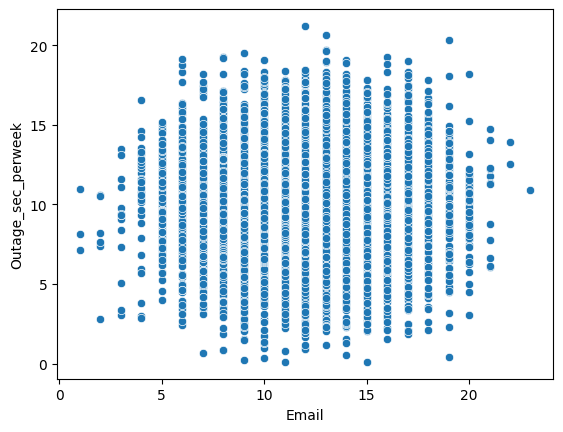

In [70]:
sns.scatterplot(data= updated_data, x = "Email", y = "Outage_sec_perweek")
plt.show()

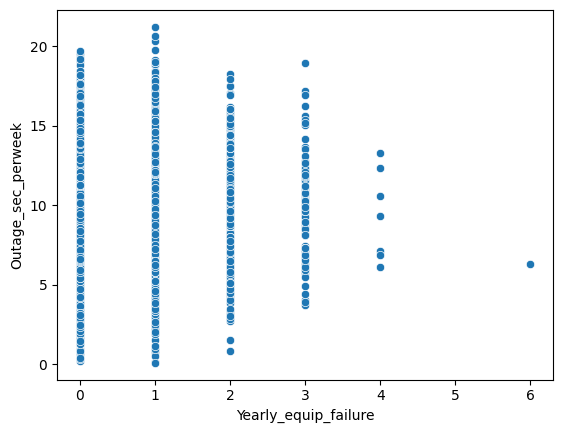

In [73]:
sns.scatterplot(data= updated_data, x = "Yearly_equip_failure", y = "Outage_sec_perweek")
plt.show()